# Witamy w Colab

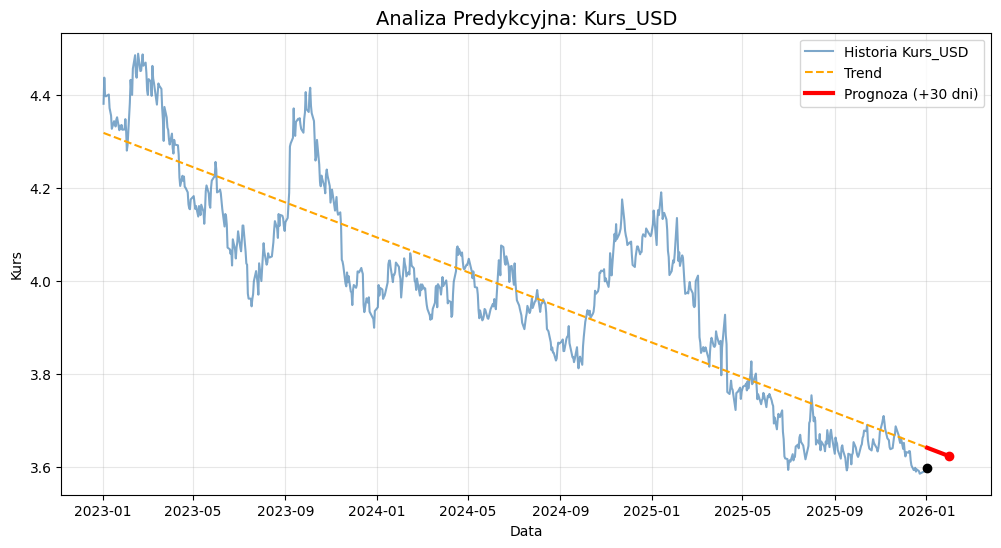

📈 Ostatni znany kurs: 3.5963
🔮 Prognoza za 30 dni: 3.6227


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


waluta_do_analizy = 'Kurs_USD'
ile_dni_do_przodu = 30

data = df.copy()

data['Data'] = pd.to_datetime(data['Data'])
data = data.sort_values('Data')

data = data.dropna(subset=[waluta_do_analizy])

data['Dni_Liczbowe'] = (data['Data'] - data['Data'].min()).dt.days

wspolczynniki = np.polyfit(data['Dni_Liczbowe'], data[waluta_do_analizy], 1)
funkcja_trendu = np.poly1d(wspolczynniki)

ostatni_dzien_liczbowy = data['Dni_Liczbowe'].max()
ostatnia_data = data['Data'].max()

przyszlosc_x = np.arange(ostatni_dzien_liczbowy, ostatni_dzien_liczbowy + ile_dni_do_przodu)
prognoza_y = funkcja_trendu(przyszlosc_x)

przyszlosc_daty = [data['Data'].min() + pd.Timedelta(days=int(d)) for d in przyszlosc_x]

plt.figure(figsize=(12, 6))

plt.plot(data['Data'], data[waluta_do_analizy], label=f'Historia {waluta_do_analizy}', color='steelblue', alpha=0.7)

plt.plot(data['Data'], funkcja_trendu(data['Dni_Liczbowe']), color='orange', linestyle='--', label='Trend')

plt.plot(przyszlosc_daty, prognoza_y, color='red', linewidth=3, label=f'Prognoza (+{ile_dni_do_przodu} dni)')

plt.scatter(ostatnia_data, data[waluta_do_analizy].iloc[-1], color='black', zorder=5)
plt.scatter(przyszlosc_daty[-1], prognoza_y[-1], color='red', zorder=5)

plt.title(f'Analiza Predykcyjna: {waluta_do_analizy}', fontsize=14)
plt.xlabel('Data')
plt.ylabel('Kurs')
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

print(f"📈 Ostatni znany kurs: {data[waluta_do_analizy].iloc[-1]:.4f}")
print(f"🔮 Prognoza za {ile_dni_do_przodu} dni: {prognoza_y[-1]:.4f}")